# **CATS vs DOGS CLASSIFICATION (KAGGLE DATASET)**

## In this notebook, I have made an attempt to develop a CNN model from scratch to classify whether images contain either a dog or a cat . The dataset for this notebook was taken from Kaggle.

Dataset Link:https://www.kaggle.com/tongpython/cat-and-dog 

Prediction Testing Link:https://www.kaggle.com/max22112019/testing-cat-or-dog

## Importing the Libraries

In [ ]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

## Importing the Dataset and Data Preprocessing

In [ ]:
# Define Constants
FAST_RUN = False
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

#### Training Generator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1, rotation_range=15)

training_set = train_datagen.flow_from_directory('../input/cat-and-dog/training_set/training_set',
                                                 target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


Testing Generator

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../input/cat-and-dog/test_set/test_set',
                                            target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
                                            batch_size = 32,
                                            class_mode = 'binary',shuffle=False)

Found 2023 images belonging to 2 classes.


## Building the CNN Model

In [ ]:
model = tf.keras.models.Sequential()

#Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_WIDTH, 
                                                                                 IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

#Adding a 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

#Adding a 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

## Fit the Model

In [ ]:
#Callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=10)

#Learning Rate Reduction
#We will reduce the learning rate when then accuracy not increase for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
epochs=3 if FAST_RUN else 25
cnn = model.fit(
    x = training_set, validation_data = test_set, 
    epochs=epochs,
    callbacks=callbacks)

Epoch 1/25
251/251 [==============================] - 171s 681ms/step - loss: 0.8016 - accuracy: 0.5988 - val_loss: 1.3153 - val_accuracy: 0.4998
Epoch 2/25
251/251 [==============================] - 133s 529ms/step - loss: 0.6334 - accuracy: 0.6645 - val_loss: 0.7813 - val_accuracy: 0.5986
Epoch 3/25
251/251 [==============================] - 131s 522ms/step - loss: 0.5870 - accuracy: 0.6948 - val_loss: 0.5977 - val_accuracy: 0.6673
Epoch 4/25
251/251 [==============================] - 132s 527ms/step - loss: 0.5574 - accuracy: 0.7153 - val_loss: 0.6764 - val_accuracy: 0.6584
Epoch 5/25
251/251 [==============================] - 130s 517ms/step - loss: 0.5477 - accuracy: 0.7177 - val_loss: 0.5241 - val_accuracy: 0.7296
Epoch 6/25
251/251 [==============================] - 130s 518ms/step - loss: 0.5221 - accuracy: 0.7390 - val_loss: 0.5766 - val_accuracy: 0.7138
Epoch 7/25
251/251 [==============================] - 131s 520ms/step - loss: 0.4957 - accuracy: 0.7558 - val_loss: 0.7600 -

## Visualize the model training by plotting Loss Function and Accuracy

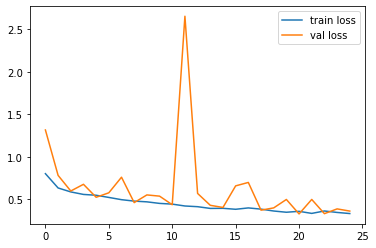

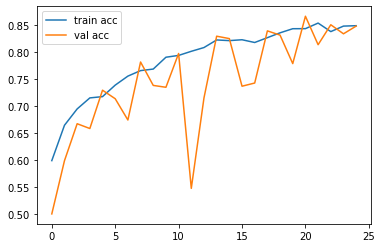

In [ ]:
# Plot the Loss Function
plt.plot(cnn.history['loss'], label='train loss')
plt.plot(cnn.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the Accuracy
plt.plot(cnn.history['accuracy'], label='train acc')
plt.plot(cnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

## Model Prediction on images not found in train and test catalog

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../input/testing-cat-or-dog/cat or dog 2.jpg', 
                            target_size = (IMAGE_WIDTH, IMAGE_HEIGHT))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

cat


**'../input/testing-cat-or-dog/cat or dog 1.jpg' is a Dog's image**

**'../input/testing-cat-or-dog/cat or dog 2.jpg' is a Cat's image**


**This CNN model which I have developed is providing me with accurate results on Prediction.**